# Final Model- Random Forest Classifier

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('this_time_forreal.csv')
df.head(15)

,Rating,Effects,Flavor,Type
0,4.0,Creative,Earthy,hybrid
1,4.0,Energetic,Sweet,hybrid
2,4.0,Tingly,Citrus,hybrid
3,4.7,Relaxed,Flowery,hybrid
4,4.7,Aroused,Violet,hybrid
5,4.7,Creative,Diesel,hybrid
6,4.4,Uplifted,Spicy/Herbal,sativa
7,4.4,Happy,Sage,sativa
8,4.4,Relaxed,Woody,sativa
9,4.2,Tingly,Apricot,hybrid


In [4]:
df.describe()

,Rating
count,6144.000000
mean,4.452051
std,0.302175
min,3.000000
25%,4.300000
50%,4.500000
75%,4.600000
max,5.000000


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from numpy import argmax

In [6]:
# define example
feature_1 = df['Effects']
value_1 = array(feature_1)
print('Defined Values Output')
print(value_1)
print('-'*50)

# integer encode
label_encoder = LabelEncoder()
integer_encoded_1 = label_encoder.fit_transform(value_1)
print('Integer Encode Output')
print(integer_encoded_1)
print('-'*50)

Defined Values Output
['Creative' 'Energetic' 'Tingly' ... 'Hungry' 'Relaxed' 'Uplifted']
--------------------------------------------------
Integer Encode Output
[ 1  2 11 ...  7  8 12]
--------------------------------------------------


In [7]:
# define example
feature_2 = df['Flavor']
value_2 = array(feature_2)
print('Defined Values Output')
print(value_2)
print('-'*50)

# integer encode
label_encoder = LabelEncoder()
integer_encoded_2 = label_encoder.fit_transform(value_2)
print('Integer Encode Output')
print(integer_encoded_2)
print('-'*50)

Defined Values Output
['Earthy' 'Sweet' 'Citrus' ... 'Berry' 'Earthy' 'Pungent']
--------------------------------------------------
Integer Encode Output
[13 40 10 ...  3 13 34]
--------------------------------------------------


In [8]:
# define example
feature_3 = df['Type']
value_3 = array(feature_3)
print('Defined Values Output')
print(value_3)
print('-'*50)

# integer encode
label_encoder = LabelEncoder()
integer_encoded_3 = label_encoder.fit_transform(value_3)
print('Integer Encode Output')
print(integer_encoded_3)
print('-'*50)

Defined Values Output
['hybrid' 'hybrid' 'hybrid' ... 'indica' 'indica' 'indica']
--------------------------------------------------
Integer Encode Output
[0 0 0 ... 1 1 1]
--------------------------------------------------


## Create a DataFrame with the Integer Encoded Values

In [9]:
Effect = pd.DataFrame(integer_encoded_1.tolist())
Flavor = pd.DataFrame(integer_encoded_2.tolist())
Type = pd.DataFrame(integer_encoded_3.tolist())

In [10]:
frames = [df['Rating'],Effect,Flavor,Type]

In [11]:
new = pd.concat(frames, axis =1)
new.columns = ['Rating','Effect','Flavor','Type']
new.head()

,Rating,Effect,Flavor,Type
0,4.0,1,13,0
1,4.0,2,40,0
2,4.0,11,10,0
3,4.7,8,14,0
4,4.7,0,47,0


In [12]:
from sklearn.utils import shuffle
shuffle(new)

,Rating,Effect,Flavor,Type
4013,4.1,3,40,1
2354,4.3,7,40,1
1207,3.9,12,48,2
3680,4.4,12,12,0
3553,4.7,6,48,0
6057,4.2,6,18,0
3734,4.9,6,21,0
2904,4.2,6,10,2
2207,5.0,12,40,0
3841,4.3,12,31,2


In [13]:
# Assign the Target variable. We want to predict the 'quality' variable Y
Y = new.Rating

# X features used to predict Y
X = new.drop('Rating',axis=True)

# Verify they have the same dimensions (number of rows)
print(Y.shape, X.shape)

(6144,) (6144, 3)


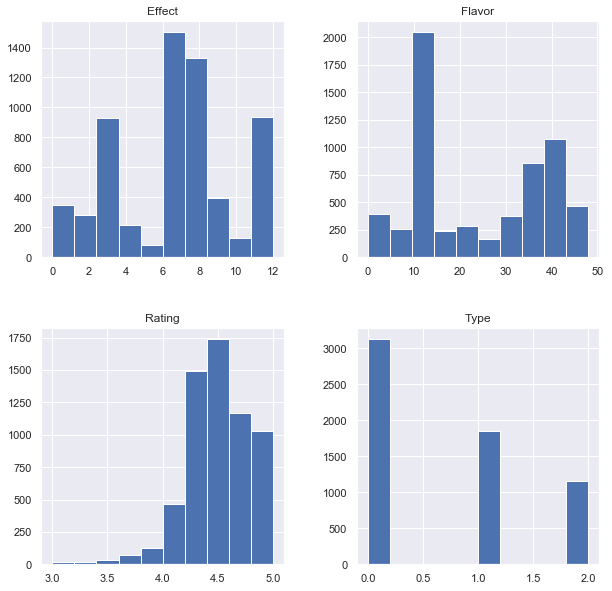

In [14]:
# Generate histograms of each feature to visualize the data and observe the distribution of the various features
sns.set()
new.hist(figsize=(10,10))
plt.show()

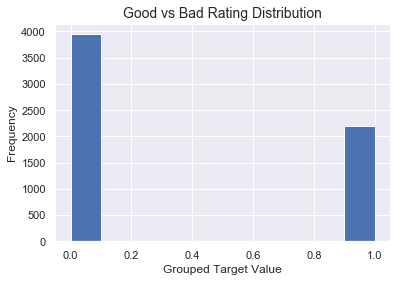

In [15]:
# Now create the different groups
# All Wines with a quality score above 5 are considered 'good'
Good_rating = (Y > 4.5).astype(int)

# plot histogram of the 'good' vs 'bad' wine distribution
rating_hist = Good_rating.plot.hist()
rating_hist.set_title('Good vs Bad Rating Distribution', fontsize=14)
rating_hist.set_xlabel('Grouped Target Value')
plt.show()

## Create the Machine Learning Model

In [16]:
#Construct a Decision Tree model and validate that model using cross validation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,Good_rating, test_size=0.2, random_state=5)

# Display the dimensions of your Training and Testing Data
print('X Train | y Train:')
print(X_train.shape, y_train.shape)
print('-'*50)
print('X test | Y Test:')
print(X_test.shape, y_test.shape)

X Train | y Train:
(4915, 3) (4915,)
--------------------------------------------------
X test | Y Test:
(1229, 3) (1229,)


In [17]:
# Create the Random Forest Classifier
classifier = RandomForestClassifier(random_state=5)
classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [18]:
# Compute k-fold cross validation on training dataset and see mean accuracy score
scores = cross_val_score(classifier,X_train, y_train, cv=10, scoring='accuracy')
print(f'Training Data Accuracy Scores : {scores}')
print('-'*50)
print(f'Training Data Mean Accuracy Score : {scores.mean()}')

Training Data Accuracy Scores : [0.61460446 0.55691057 0.6300813  0.58943089 0.63340122 0.63340122
 0.61710794 0.62525458 0.61099796 0.63136456]
--------------------------------------------------
Training Data Mean Accuracy Score : 0.6142554721610638


In [19]:
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

In [20]:
print(f'Accuracy Score : {accuracy_score(y_test, prediction)}')
print('-'*50)
print(f'Log Loss : {log_loss(y_test, prediction)}')

Accuracy Score : 0.6151342554922702
--------------------------------------------------
Log Loss : 13.29286606094369


In [21]:
confusion_matrix(y_test, prediction)

array([[673, 114],
       [359,  83]])